In [4]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Read the CSV file into a DataFrame
df = pd.read_csv('D:/Data science ass/16/KNN/Zoo.csv')

# Display the first 5 rows
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the column names and their data types
print(df.info())

| animal name   | hair   | feathers   | eggs   | milk   | airborne   | aquatic   | predator   | toothed   | backbone   | breathes   | venomous   | fins   | legs   | tail   | domestic   | catsize   | type   |
|:--------------|:-------|:-----------|:-------|:-------|:-----------|:----------|:-----------|:----------|:-----------|:-----------|:-----------|:-------|:-------|:-------|:-----------|:----------|:-------|
| aardvark      | 1      | 0          | 0      | 1      | 0          | 0         | 1          | 1         | 1          | 1          | 0          | 0      | 4      | 0      | 0          | 1         | 1      |
| antelope      | 1      | 0          | 0      | 1      | 0          | 0         | 0          | 1         | 1          | 1          | 0          | 0      | 4      | 1      | 0          | 1         | 1      |
| bass          | 0      | 0          | 1      | 0      | 0          | 1         | 1          | 1         | 1          | 0          | 0          | 1      | 0      | 1  

In [8]:
import altair as alt

# Count the occurrences of unique values in `type`
type_counts = df['type'].value_counts().reset_index()
type_counts = type_counts.set_axis(['type', 'count'], axis=1)

# Display the counts
print("Count of values in type column: \n")
print(type_counts.to_markdown(index = False))

# Create a bar chart to visualize the distribution of `type`
chart1 = alt.Chart(type_counts).mark_bar().encode(
    x=alt.X('type:N', axis=alt.Axis(title='Type')),
    y=alt.Y('count:Q', axis=alt.Axis(title='Count')),
    tooltip=['type', 'count']
).properties(
    title='Distribution of Type'
).interactive()

# Create subplots with 7 rows and 2 columns
charts = []
for i, col in enumerate(df.columns):
    # Skip `animal name` and `type` columns
    if col in ['animal name', 'type']:
        continue

    # Create a box plot for each column grouped by `type`
    chart = alt.Chart(df).mark_boxplot().encode(
        x=alt.X('type:N', axis=alt.Axis(title='Type')),
        y=alt.Y(col + ':Q', axis=alt.Axis(title=col)),
        color='type'
    ).properties(
        title=f'Box Plot of {col} by Type'
    )

    charts.append(chart)

# Arrange the charts in a 7x2 grid
fig = alt.vconcat(
    *[alt.hconcat(*charts[i:i+2]) for i in range(0, len(charts), 2)]
)

# Save the figure
fig.save('subplots_of_boxplots.json')
fig.show()


Count of values in type column: 

|   type |   count |
|-------:|--------:|
|      1 |      41 |
|      2 |      20 |
|      4 |      13 |
|      7 |      10 |
|      6 |       8 |
|      3 |       5 |
|      5 |       4 |


alt.VConcatChart(...)

In [10]:
import altair as alt
import pandas as pd

# Create a container for the subplots (7 rows x 2 columns)
charts = []
for i, col in enumerate(df.columns):
    # Skip `animal name` and `type` columns
    if col in ['animal name', 'type']:
        continue

    # Create a box plot for each column
    chart = alt.Chart(df).mark_boxplot().encode(
        y=alt.Y(col + ':Q', axis=alt.Axis(title=col))
    ).properties(
        title=f'Box Plot of {col}'
    )
    charts.append(chart)

# Arrange the charts in a 7x2 grid
fig = alt.vconcat(
    *[alt.hconcat(*charts[i:i+2]) for i in range(0, len(charts), 2)]
)

# Save the figure
fig.save('subplots_of_boxplots_without_type.json')
fig.show()
# Calculate Q1, Q3 and IQR for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_filtered = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

# Print the shape of the old and new dataframe if outliers are removed
if df.shape != df_filtered.shape:
    print(f'Old dataframe shape: {df.shape}')
    print(f'New dataframe shape: {df_filtered.shape}')
else:
    print('No outliers were removed')


alt.VConcatChart(...)

C:\Users\rishabh\AppData\Local\Temp\ipykernel_3716\3718844219.py:28: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
C:\Users\rishabh\AppData\Local\Temp\ipykernel_3716\3718844219.py:29: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
C:\Users\rishabh\AppData\Local\Temp\ipykernel_3716\3718844219.py:37: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_filtered = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]


Old dataframe shape: (101, 18)
New dataframe shape: (33, 18)


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop the `animal name` column
df_filtered = df_filtered.drop('animal name', axis=1)

# Separate features and target variable
X = df_filtered.drop('type', axis=1)
y = df_filtered['type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Print the shapes of the resulting arrays
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (26, 16)
X_test shape: (7, 16)
y_train shape: (26,)
y_test shape: (7,)


In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Create a KNN classifier
knn = KNeighborsClassifier()

# Define the range of `n_neighbors` values to test
k_values = list(range(1, 11))

# Perform cross-validation to find the best `n_neighbors`
cv_scores = []
for k in k_values:
    knn.n_neighbors = k
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the best `n_neighbors`
best_k = k_values[cv_scores.index(max(cv_scores))]
print(f'The best value of n_neighbors is {best_k}')

# Create a KNN classifier with the best `n_neighbors`
knn_best = KNeighborsClassifier(n_neighbors=best_k)
# Fit the model on the training data
knn_best.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\s

The best value of n_neighbors is 1


KNeighborsClassifier(n_neighbors=1)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define the distance metrics to test
distance_metrics = ['euclidean', 'manhattan', 'minkowski']

# Iterate over the distance metrics
for metric in distance_metrics:
    # Create a KNN classifier with the specified metric and n_neighbors = 1
    knn = KNeighborsClassifier(n_neighbors=1, metric=metric)
    
    # Fit the model on the training data
    knn.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = knn.predict(X_test)
    
    # Calculate and print the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy with {metric} distance: {accuracy:.2f}')


Accuracy with euclidean distance: 1.00
Accuracy with manhattan distance: 1.00
Accuracy with minkowski distance: 1.00


In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Predict on the test data
y_pred = knn_best.predict(X_test)

# Calculate and print the evaluation metrics
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted")}')
print(f'Recall: {recall_score(y_test, y_pred,average="weighted")}')
print(f'F1-score: {f1_score(y_test, y_pred, average="weighted")}')

# Print the classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

Classification Report:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         1

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



The two most important features are: Index(['hair', 'milk'], dtype='object')


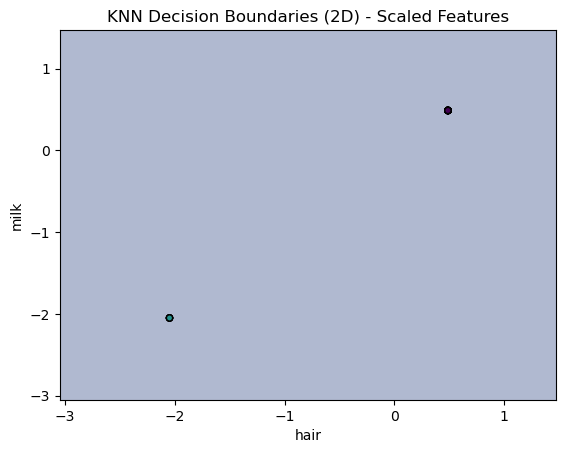

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Train a Random Forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Select the two most important features
indices = np.argsort(importances)[::-1][:2]
top_features = X.columns[indices]
print(f'The two most important features are: {top_features}')

# Create a KNN classifier with the best `n_neighbors`
knn_best = KNeighborsClassifier(n_neighbors=1)  # Assuming best_k is 1 from previous analysis

# Fit the model on the training data
knn_best.fit(X_train, y_train)

# Create a meshgrid for plotting using the standardized training data
x_min, x_max = X_train[:, indices[0]].min() - 1, X_train[:, indices[0]].max() + 1
y_min, y_max = X_train[:, indices[1]].min() - 1, X_train[:, indices[1]].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Create a zero array with the same number of columns as the original data
meshgrid_original = np.zeros((xx.ravel().shape[0], X.shape[1]))

# Fill in the two columns corresponding to the top features with the meshgrid data
meshgrid_original[:, indices[0]] = xx.ravel()
meshgrid_original[:, indices[1]] = yy.ravel()

# Inverse transform the filled array back to the original feature space
meshgrid_scaled = scaler.inverse_transform(meshgrid_original)

# Predict on the meshgrid
Z = knn_best.predict(meshgrid_scaled)
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train[:, indices[0]], X_train[:, indices[1]], c=y_train, s=20, edgecolor='k')
plt.xlabel(top_features[0])
plt.ylabel(top_features[1])
plt.title('KNN Decision Boundaries (2D) - Scaled Features')
plt.show()


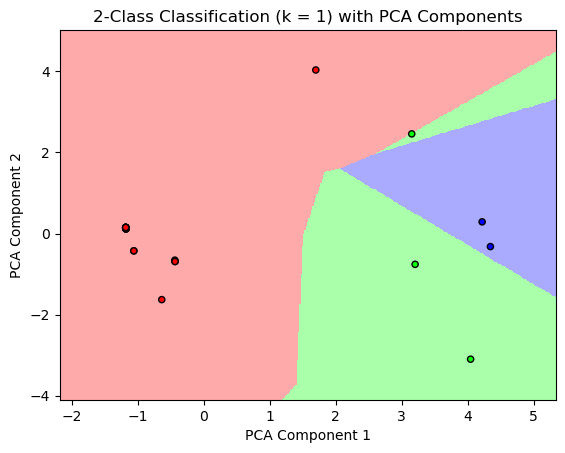

In [28]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

# Project the data onto 2D using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Create a meshgrid to cover the 2D space
h = .02  # Step size in the mesh
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict the class labels for each point in the mesh
Z = knn_best.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

# Create a color map for the different classes
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot the decision boundaries and the data points
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')  # Add shading='auto' to avoid warnings
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"2-Class Classification (k = {best_k}) with PCA Components")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


1. What are the key hyperparameters in KNN?
 
K-Nearest Neighbors (KNN) is a simple yet effective algorithm that classifies or regresses new data points based on the majority class or average values of their k nearest neighbors. Here are the key hyperparameters in KNN:

- K: The number of neighbors considered for making predictions. A larger K can reduce the impact of noise but might introduce bias.

- Distance metric: The function used to calculate the distance between data points. Common metrics include Euclidean distance, Manhattan distance, and Minkowski distance.

- Weighting: Determines how the votes of neighbors are weighted. Options include uniform weighting (all neighbors have equal weight) and distance weighting (closer neighbors have higher weight).

2. What distance metrics can be used in KNN?
   
The choice of distance metric in KNN significantly affects the results. Here are some common distance metrics:

- Euclidean distance: Calculates the straight-line distance between two points in Euclidean space.

- Manhattan distance: Also known as L1 distance, calculates the sum of absolute differences between corresponding coordinates.

- Minkowski distance: A generalization of Euclidean and Manhattan distances. The parameter p determines the degree of distance.

- Hamming distance: Used for categorical data, counts the number of positions where the corresponding elements are different.

- Cosine similarity: Measures the cosine of the angle between two vectors, often used for text data.

Choosing the right distance metric:

- Data type: The nature of the data (e.g., numerical, categorical) influences the choice of metric.

- Scale: If features have different scales, normalization or standardization might be necessary before applying distance metrics.

- Domain knowledge: Consider the specific characteristics of your data and the relationships between features.